In [4]:
!pip install pandas numpy faker matplotlib seaborn  



  Using cached Faker-36.1.1-py3-none-any.whl.metadata (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.1 MB/s eta 0:00:00


In [6]:
import sqlite3
print("✅ SQLite3 is available!")


✅ SQLite3 is available!


In [3]:
import os
print(os.getcwd())  # This prints the Jupyter Notebook directory


/Users/vincijohnson


In [12]:
import pandas as pd

# Load dataset (since it's now in the Jupyter working directory)
sales_df = pd.read_csv("retail_sales_data.csv")

# Display first few rows
print("✅ Dataset Loaded Successfully!")
display(sales_df.head())


✅ Dataset Loaded Successfully!


,order_id,product_name,category,price,quantity_sold,total_revenue,order_date,customer_location
0,65328495-073e-4e93-ada2-377ba57086be,T-Shirt,Clothing,488.86,9,4399.74,2024-09-22,North Carolynfurt
1,86524156-0c60-4469-a849-f1de91102256,Jacket,Clothing,976.52,3,2929.56,2024-05-15,Jasonchester
2,42700bb7-847e-4ad3-8140-0d8dfd8d73dc,Lipstick,Beauty & Health,156.69,3,470.07,2024-11-30,New Andrew
3,cd7bee72-35d2-4074-82a2-1e30f7e4776f,Coffee Maker,Home & Kitchen,421.97,1,421.97,2024-03-01,West Davidmouth
4,5a5b5f91-ad57-4455-b58e-228c1910095c,Yoga Mat,Sports,496.57,4,1986.28,2024-03-23,South Joanna


In [16]:
import sqlite3
import pandas as pd

# Load dataset
sales_df = pd.read_csv("retail_sales_data.csv")
conn = sqlite3.connect(":memory:")
sales_df.to_sql("sales_data", conn, index=False, if_exists="replace")

# Define SQL queries
queries = {
    "top_5_best_selling_products": """
        SELECT product_name, SUM(total_revenue) AS total_sales
        FROM sales_data
        GROUP BY product_name
        ORDER BY total_sales DESC
        LIMIT 5;
    """,

    "top_5_best_selling_categories": """
        SELECT category, SUM(total_revenue) AS total_sales
        FROM sales_data
        GROUP BY category
        ORDER BY total_sales DESC
        LIMIT 5;
    """,

    "best_performing_locations": """
        SELECT customer_location, SUM(total_revenue) AS total_sales
        FROM sales_data
        GROUP BY customer_location
        ORDER BY total_sales DESC
        LIMIT 5;
    """,

    "monthly_sales_trend": """
        SELECT strftime('%Y-%m', order_date) AS month_year, SUM(total_revenue) AS total_sales
        FROM sales_data
        GROUP BY month_year
        ORDER BY month_year;
    """,

    "highest_spending_customers": """
        SELECT customer_location, SUM(total_revenue) AS total_spent
        FROM sales_data
        GROUP BY customer_location
        ORDER BY total_spent DESC
        LIMIT 5;
    """
}

# Execute queries and save results as CSV
for name, query in queries.items():
    df = pd.read_sql_query(query, conn)
    df.to_csv(f"{name}.csv", index=False)
    print(f"\n{name.replace('_', ' ').title()} Results:\n", df)

# Close connection
conn.close()



Top 5 Best Selling Products Results:
   product_name  total_sales
0    Dumbbells    152908.49
1    Sunscreen    136276.90
2       Jacket    134624.93
3      Toaster    133880.04
4       Tablet    127296.29

Top 5 Best Selling Categories Results:
           category  total_sales
0           Sports    564297.72
1         Clothing    557794.52
2   Home & Kitchen    550122.35
3  Beauty & Health    530526.52
4      Electronics    469297.29

Best Performing Locations Results:
   customer_location  total_sales
0      South Andrew     13265.46
1     North Michael     12545.55
2         Kingburgh     12231.33
3      Rebeccahaven     10423.41
4       East Andrew     10323.68

Monthly Sales Trend Results:
    month_year  total_sales
0     2024-02     29736.72
1     2024-03    233985.21
2     2024-04    213104.70
3     2024-05    251187.61
4     2024-06    184464.29
5     2024-07    250581.62
6     2024-08    199433.31
7     2024-09    255983.35
8     2024-10    219473.00
9     2024-11    237518.

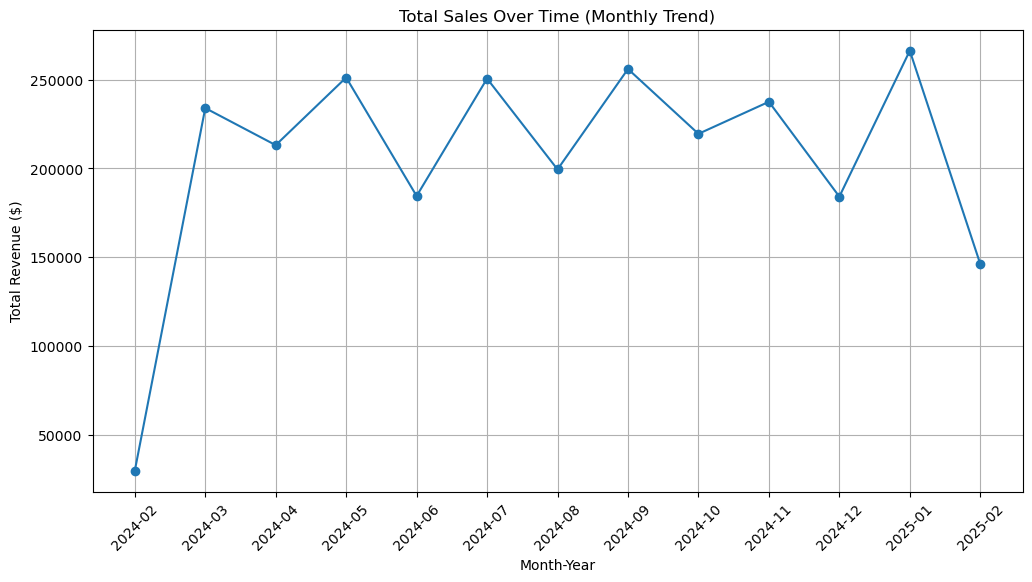

Top 5 Best-Selling Products:
   product_name  total_sales
0    Dumbbells    152908.49
1    Sunscreen    136276.90
2       Jacket    134624.93
3      Toaster    133880.04
4       Tablet    127296.29


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Load dataset
sales_df = pd.read_csv("retail_sales_data.csv")  # Assume dataset is in CSV format

# Convert date column to datetime
sales_df["order_date"] = pd.to_datetime(sales_df["order_date"])

# Connect to SQLite database
conn = sqlite3.connect(":memory:")
sales_df.to_sql("sales_data", conn, index=False, if_exists="replace")

# SQL Queries
queries = {
    "top_5_best_selling_products": """
        SELECT product_name, SUM(total_revenue) AS total_sales
        FROM sales_data
        GROUP BY product_name
        ORDER BY total_sales DESC
        LIMIT 5;
    """,
    "monthly_sales_trend": """
        SELECT strftime('%Y-%m', order_date) AS month_year, SUM(total_revenue) AS total_sales
        FROM sales_data
        GROUP BY month_year
        ORDER BY month_year;
    """
}

# Execute SQL queries and store results
query_results = {name: pd.read_sql_query(query, conn) for name, query in queries.items()}

# Close connection
conn.close()

# Visualization - Monthly Sales Trend
monthly_sales = query_results["monthly_sales_trend"]
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales["month_year"], monthly_sales["total_sales"], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue ($)")
plt.title("Total Sales Over Time (Monthly Trend)")
plt.grid(True)
plt.show()

# Display Top-Selling Products
top_products = query_results["top_5_best_selling_products"]
print("Top 5 Best-Selling Products:\n", top_products)


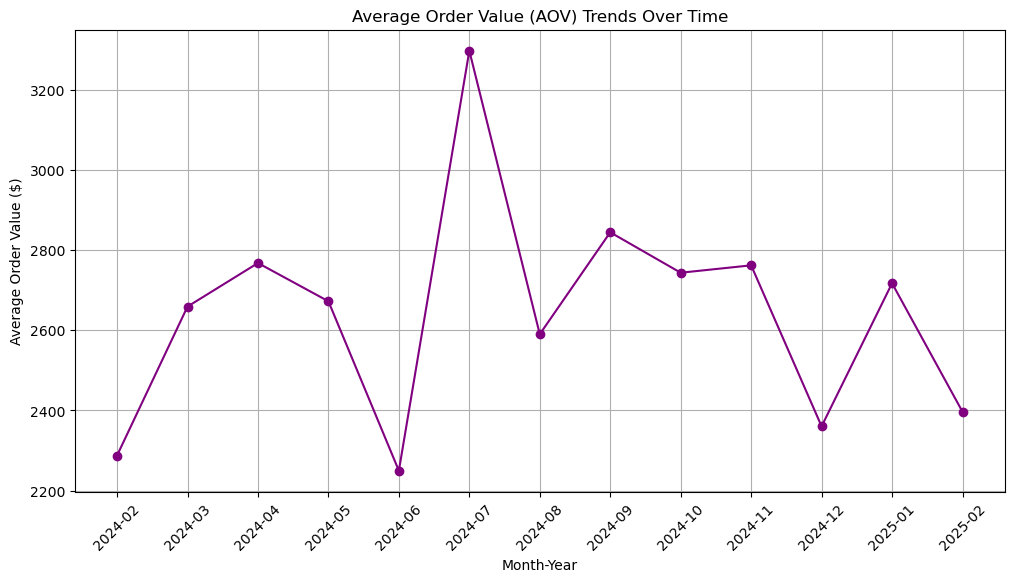

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
sales_df = pd.read_csv("retail_sales_data.csv")

# Convert order_date to datetime
sales_df["order_date"] = pd.to_datetime(sales_df["order_date"])

# Aggregate total revenue by month
aov_trends = sales_df.groupby(sales_df["order_date"].dt.to_period("M")).agg(
    total_revenue=("total_revenue", "sum"),
    total_orders=("order_id", "count")
).reset_index()
aov_trends["average_order_value"] = aov_trends["total_revenue"] / aov_trends["total_orders"]
aov_trends["month_year"] = aov_trends["order_date"].astype(str)


# Plot Average Order Value (AOV) Trends
plt.figure(figsize=(12, 6))
plt.plot(aov_trends["month_year"], aov_trends["average_order_value"], marker='o', linestyle='-', color='purple')
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Average Order Value ($)")
plt.title("Average Order Value (AOV) Trends Over Time")
plt.grid(True)
plt.savefig("aov_trend.png")
plt.show()


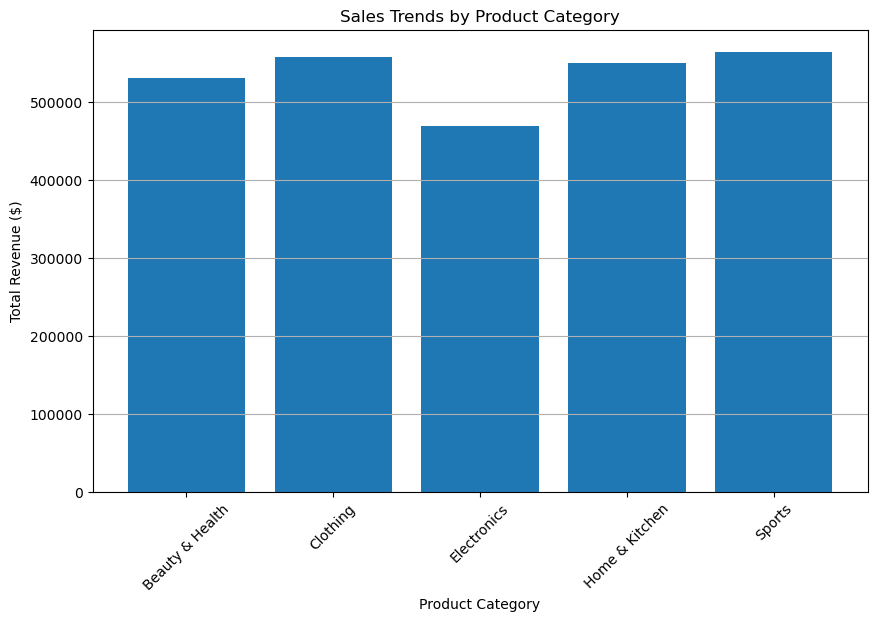

In [28]:
# Step 2: Aggregate total revenue by category
category_sales = sales_df.groupby("category")["total_revenue"].sum().reset_index()

# Plot Sales by Category
plt.figure(figsize=(10, 6))
plt.bar(category_sales["category"], category_sales["total_revenue"])
plt.xlabel("Product Category")
plt.ylabel("Total Revenue ($)")
plt.title("Sales Trends by Product Category")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


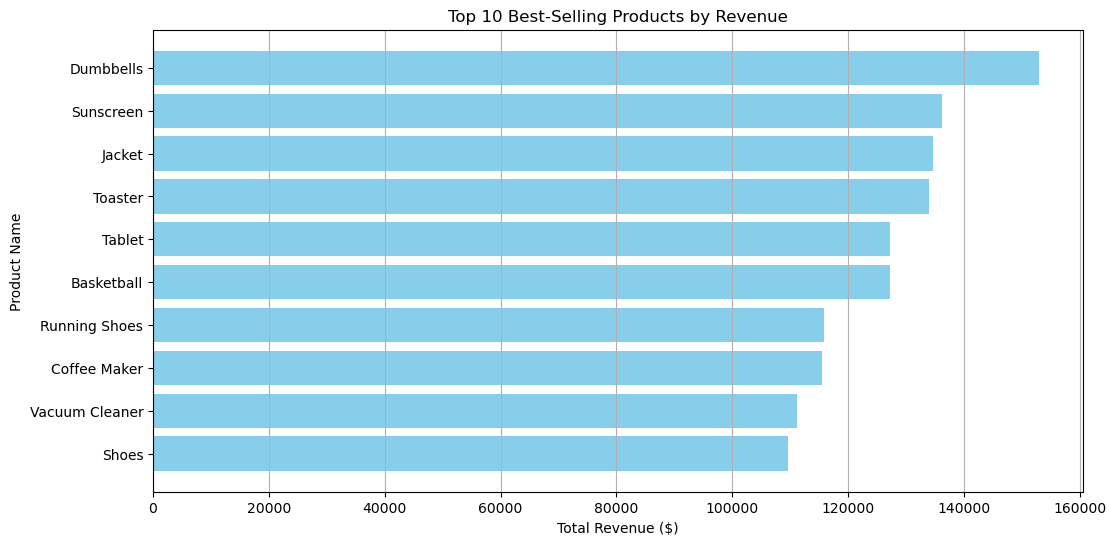

In [30]:
# Step 3: Aggregate total revenue by product name and get top 10 products
top_products = sales_df.groupby("product_name")["total_revenue"].sum().reset_index()
top_products = top_products.sort_values(by="total_revenue", ascending=False).head(10)

# Plot Top-Selling Products
plt.figure(figsize=(12, 6))
plt.barh(top_products["product_name"], top_products["total_revenue"], color='skyblue')
plt.xlabel("Total Revenue ($)")
plt.ylabel("Product Name")
plt.title("Top 10 Best-Selling Products by Revenue")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.grid(axis='x')
plt.show()
